In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [6]:
data = pd.read_csv("C:\\Users\\pravi\\Downloads\\EDA\\project1_df.csv")

In [7]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], dayfirst=True)

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CID                    55000 non-null  int64         
 1   TID                    55000 non-null  int64         
 2   Gender                 55000 non-null  object        
 3   Age Group              55000 non-null  object        
 4   Purchase Date          55000 non-null  datetime64[ns]
 5   Product Category       55000 non-null  object        
 6   Discount Availed       55000 non-null  object        
 7   Discount Name          27415 non-null  object        
 8   Discount Amount (INR)  55000 non-null  float64       
 9   Gross Amount           55000 non-null  float64       
 10  Net Amount             55000 non-null  float64       
 11  Purchase Method        55000 non-null  object        
 12  Location               55000 non-null  object        
dtypes

# Handle Missing Values

In [10]:
print("\nMissing Values Before Cleaning:\n", data.isnull().sum())
data['Discount Name'] = data['Discount Name'].fillna('No Discount')
print("\nMissing Values After Cleaning:\n", data.isnull().sum())


Missing Values Before Cleaning:
 CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

Missing Values After Cleaning:
 CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64


# Create EDA Visualizations


1.Product Category Performance.

C:\Users\pravi\AppData\Local\Temp\ipykernel_25552\135186567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


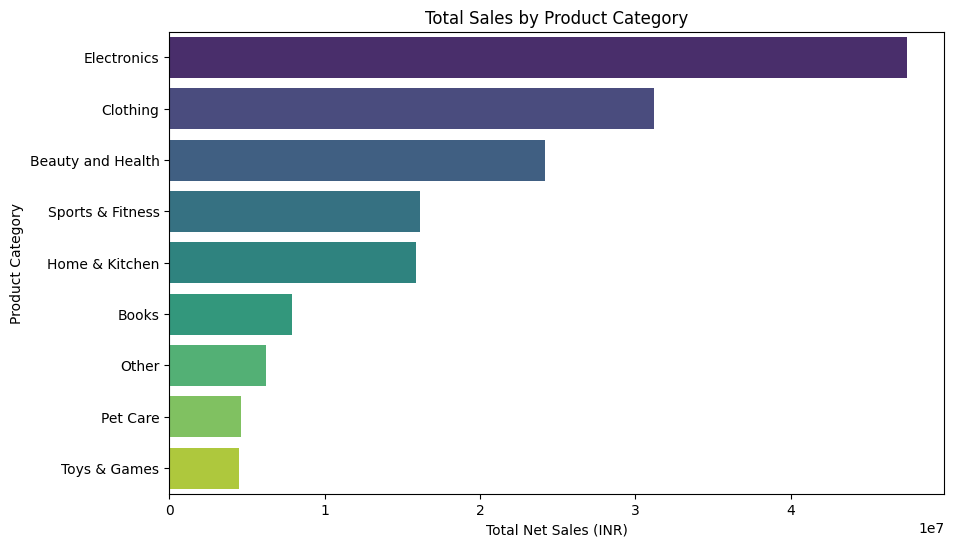

In [11]:
category_sales = data.groupby('Product Category')['Net Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Net Sales (INR)')
plt.ylabel('Product Category')
plt.show()

2. Discount Availed Distribution

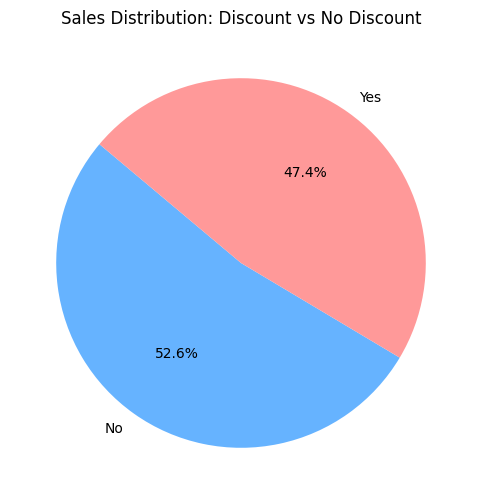

In [12]:
discount_sales = data.groupby('Discount Availed')['Net Amount'].sum()
plt.figure(figsize=(6,6))
discount_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Sales Distribution: Discount vs No Discount')
plt.ylabel('')
plt.show()

3. Monthly Sales Trend

C:\Users\pravi\AppData\Local\Temp\ipykernel_25552\1043331967.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Net Amount'].resample('M').sum()


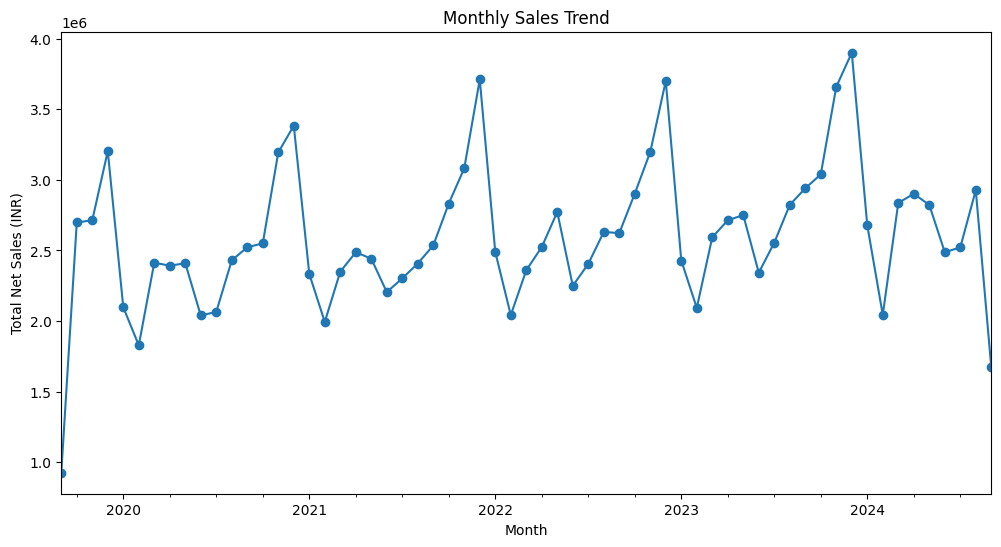

In [13]:
data.set_index('Purchase Date', inplace=True)
monthly_sales = data['Net Amount'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Net Sales (INR)')
plt.show()
data.reset_index(inplace=True)

4. Purchase Method Preference

C:\Users\pravi\AppData\Local\Temp\ipykernel_25552\3402970020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_counts.index, y=method_counts.values, palette='magma')


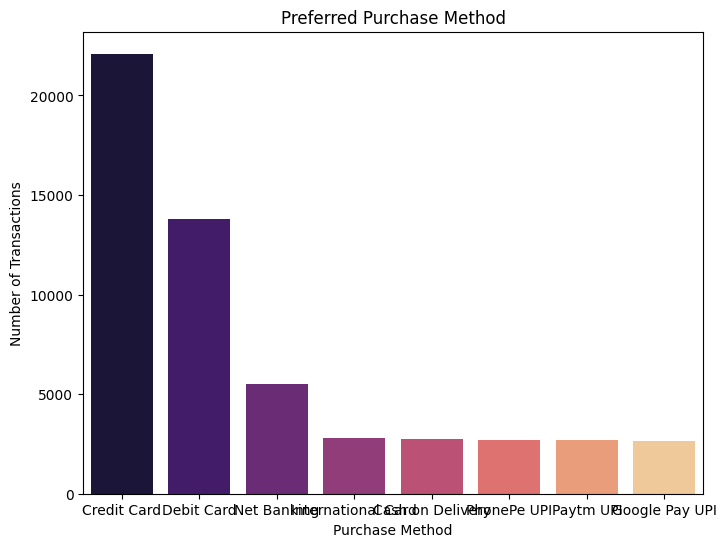

In [14]:
method_counts = data['Purchase Method'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=method_counts.index, y=method_counts.values, palette='magma')
plt.title('Preferred Purchase Method')
plt.ylabel('Number of Transactions')
plt.xlabel('Purchase Method')
plt.show()


5. Location-wise Sales Performance

C:\Users\pravi\AppData\Local\Temp\ipykernel_25552\999135123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_sales.values, y=location_sales.index, palette='coolwarm')


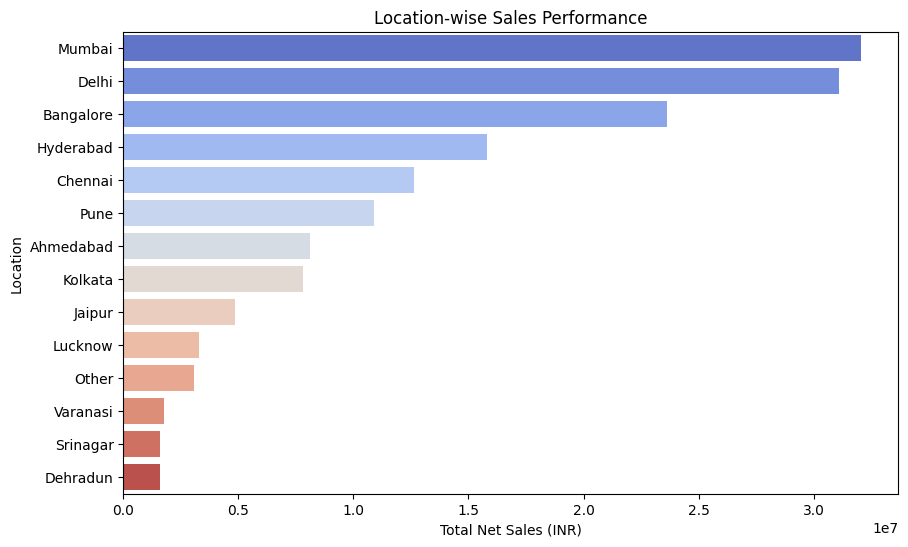

In [15]:
location_sales = data.groupby('Location')['Net Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=location_sales.values, y=location_sales.index, palette='coolwarm')
plt.title('Location-wise Sales Performance')
plt.xlabel('Total Net Sales (INR)')
plt.ylabel('Location')
plt.show()

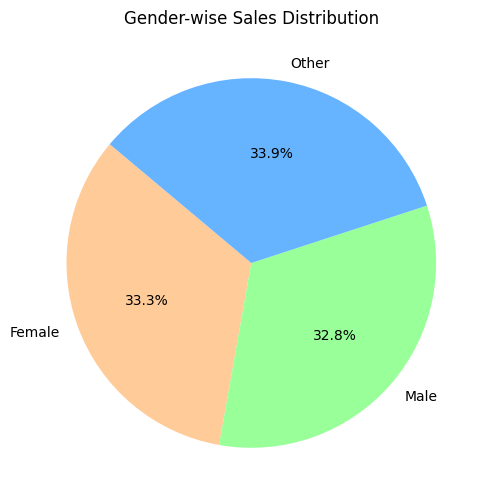

In [16]:
gender_sales = data.groupby('Gender')['Net Amount'].sum()
plt.figure(figsize=(6,6))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ffcc99','#99ff99','#66b3ff'])
plt.title('Gender-wise Sales Distribution')
plt.ylabel('')
plt.show()


7. Age Group-wise Sales Distribution

C:\Users\pravi\AppData\Local\Temp\ipykernel_25552\706046254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.values, y=age_group_sales.index, palette='cubehelix')


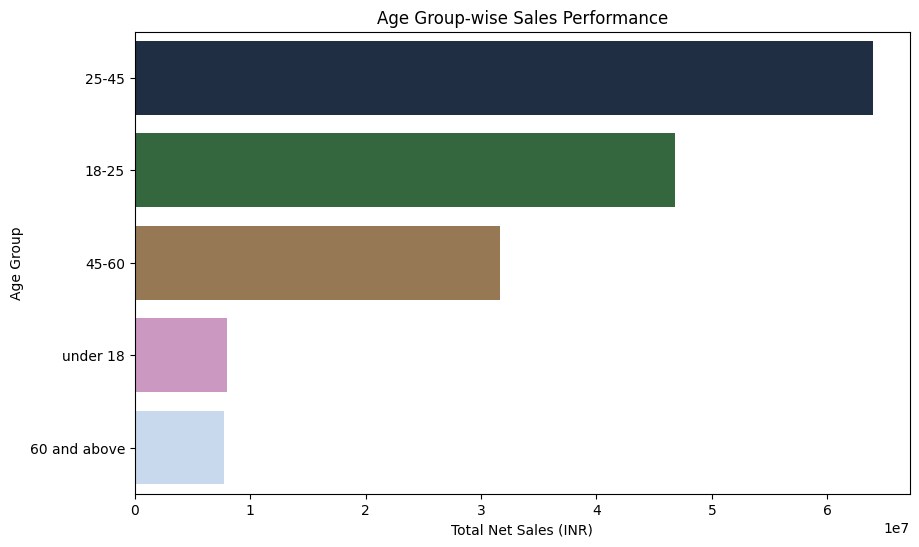

In [17]:
age_group_sales = data.groupby('Age Group')['Net Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_sales.values, y=age_group_sales.index, palette='cubehelix')
plt.title('Age Group-wise Sales Performance')
plt.xlabel('Total Net Sales (INR)')
plt.ylabel('Age Group')
plt.show()

<Axes: ylabel='Product Category'>

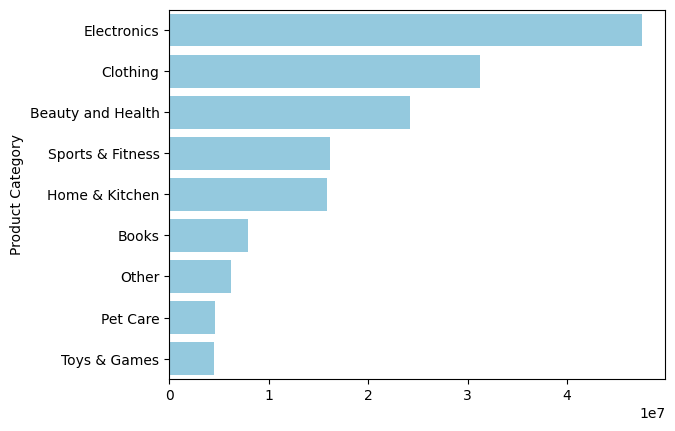

In [18]:
sns.barplot(x=category_sales.values, y=category_sales.index, color='skyblue')
